In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC # support vector classifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [4]:
df["Class"].value_counts()

orange    20
apple     20
Name: Class, dtype: int64

In [5]:
df["Class"].value_counts(normalize=True)

orange    0.5
apple     0.5
Name: Class, dtype: float64

In [6]:
df["Class"].replace({"orange":0,"apple":1},inplace=True)

In [7]:
df["Class"].value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

In [8]:
df.columns

Index(['Weight', 'Size', 'Class'], dtype='object')

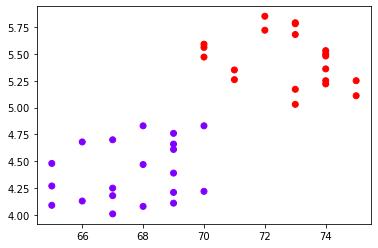

In [10]:
plt.scatter(df["Weight"],df["Size"],c=df["Class"],cmap="rainbow")

In [11]:
x = df.drop("Class",axis=1)
y = df["Class"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#### Model 

In [12]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [13]:
# On testing side
y_pred = svc_model.predict(x_test)
cnf_matric = confusion_matrix(y_test,y_pred)
print("Confusion metric\n",cnf_matric)

cnf_report = classification_report(y_test,y_pred)
print("classification report\n",cnf_report)

# On training side
y_pred = svc_model.predict(x_train)
cnf_matric = confusion_matrix(y_train,y_pred)
print("Confusion metric\n",cnf_matric)

cnf_report = classification_report(y_train,y_pred)
print("classification report\n",cnf_report)

Confusion metric
 [[3 1]
 [0 4]]
classification report
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8

Confusion metric
 [[16  0]
 [ 0 16]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

